# P4: Explore and Summarize Data. Data of the Bank of Russia

### author: Olga Belitskaya
### date: 19/08/2016

# 1. Tools

##### Let's start the description of the project with definition of working tools: the directory for storing generated files, the list of downloaded packages and the collection of useful links.

## 1.1 Setup Working Directory
'/Users/olgabelitskaya/projects/nd002/Data_Analyst_ND_Project4'

#### I run *ipython nbconvert the_name_of_the_stuff.ipynb --to slides*  to generate the HTML 

In [22]:
options(warn=-1)

## 1.2 Useful links

1) http://www.theanalysisfactor.com/interpreting-regression-coefficients/

2) http://docs.ggplot2.org/current/coord_trans.html

3) https://www.r-bloggers.com/interpreting-regression-coefficient-in-r/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+RBloggers+%28R+bloggers%29

4) http://personality-project.org/r/html/corr.test.html

5) https://rpubs.com/hadley/ggplot2-layers

6) http://rmarkdown.rstudio.com/articles_integration.html

7) https://http://blog.yhat.com/posts/r-lm-summary.html

8) http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/

9) http://data.princeton.edu/R/linearModels.html

10) https://www.rstudio.com/wp-content/uploads/2015/03/rmarkdown-reference.pdf

## 1.3 Libraries

List of the libraries: 
devtools, knitr, markdown, ggplot2, ggthemes, RColorBrewer, gridExtra, scales,
reshape2, plyr, GGally, dplyr, tidyr, xlsx, lubridate, corrplot, plotly, etc.

In [5]:
library(knitr)
library(markdown)
library(ggplot2)
library(RColorBrewer)
library(scales)
library(reshape2)
library(plyr)
library(dplyr)
library(tidyr)

In [6]:
library(devtools)
library(gridExtra)
library(xlsx)
library(lubridate)

In [44]:
library(ggthemes)
library(GGally)
library(corrplot)
# library(plotly)
library(PerformanceAnalytics)
# library(memisc)
library(RCurl)

# 2. Data

## 2.1 Introduction
##### I have chosen an open database of quotations of currencies and precious metals located on the site of the Bank of Russia. 

http://www.cbr.ru/Eng/hd_base/

##### I think it is easy to visualize the analysis of variables and dependencies in this case. From publicly available data the file in xlsx format has been generated and downloaded.

## 2.2 Load the Data and Review

##### Using suitable fuctions (read.xlsx, data.frame) I had read the file as a dataframe. It was called "centrobank".


In [8]:
centrobank <- data.frame(read.xlsx("c_bank.xlsx", sheetName="Data", header=TRUE))
head(centrobank)

,date,dual_currency_basket,EUR_978,USD_840,k_JPY,JPY_392_100,JPY_392,k_CNY,CNY_156_k,CNY_156,BRL_986,k_INR,INR_356_k,INR_356,gold,silver,platinum,palladium,foreign_exchange_reserves,monetary_gold
1,15350,35.8717,40.7591,31.8729,100,41.4931,0.414931,10,50.4805,5.04805,17.3884,100,60.9978,0.609978,1667.25,29.56,1495.09,648.66,453 952,44 697
2,15351,35.6115,40.4061,31.6886,100,41.1968,0.411968,10,50.1576,5.01576,17.6077,100,61.3318,0.613318,1671.87,30.25,1512.93,653.06,453 952,44 697
3,15352,35.5527,40.2852,31.6807,100,41.1999,0.411999,10,50.1467,5.01467,17.5711,100,61.1597,0.611597,1683.17,30.36,1527.84,652.9,453 952,44 697
4,15353,35.6492,40.6189,31.583,100,41.1585,0.411585,10,50.0507,5.00507,17.7632,100,61.4904,0.614904,1667.31,31.05,1505.86,641.74,453 952,44 697
5,15356,35.7368,40.3842,31.9344,100,41.584,0.41584,10,50.5843,5.05843,17.8914,100,62.0387,0.620387,1687.4,30.43,1528.78,657.1,453 952,44 697
6,15357,35.4254,40.1688,31.5445,100,41.1781,0.411781,10,49.9794,4.99794,17.6621,100,61.7944,0.617944,1685.56,30.32,1547.64,662.26,453 952,44 697


##### First, there were no values "NA" in this dataframe, it was specially checked.

In [9]:
row.with.na <- apply(centrobank, 1, function(x){any(is.na(x))})
s <- sum(row.with.na)
cat('sum(row.with.na) = ', s)

sum(row.with.na) =  0

##### Second, let us have a look on dataframe components (variables and their types, values, etc.).

In [10]:
str(centrobank)

'data.frame':	1128 obs. of  20 variables:
 $ date                     : Date, format: "2012-01-11" "2012-01-12" ...
 $ dual_currency_basket     : num  35.9 35.6 35.6 35.6 35.7 ...
 $ EUR_978                  : num  40.8 40.4 40.3 40.6 40.4 ...
 $ USD_840                  : num  31.9 31.7 31.7 31.6 31.9 ...
 $ k_JPY                    : num  100 100 100 100 100 100 100 100 100 100 ...
 $ JPY_392_100              : num  41.5 41.2 41.2 41.2 41.6 ...
 $ JPY_392                  : num  0.415 0.412 0.412 0.412 0.416 ...
 $ k_CNY                    : num  10 10 10 10 10 10 10 10 10 10 ...
 $ CNY_156_k                : num  50.5 50.2 50.1 50.1 50.6 ...
 $ CNY_156                  : num  5.05 5.02 5.01 5.01 5.06 ...
 $ BRL_986                  : num  17.4 17.6 17.6 17.8 17.9 ...
 $ k_INR                    : num  100 100 100 100 100 100 100 100 100 100 ...
 $ INR_356_k                : num  61 61.3 61.2 61.5 62 ...
 $ INR_356                  : num  0.61 0.613 0.612 0.615 0.62 ...
 $ gold      

##### Third, we should notice that variables that indicating exchange rates are measured in rubles, the prices of precious metals are denoted in rubles per gram, foreign exchange reserves and monetary gold reserves in RF - in millions of US dollars for every month.

In [11]:
summary(centrobank)

      date            dual_currency_basket    EUR_978         USD_840     
 Min.   :2012-01-11   Min.   :33.30        Min.   :38.41   Min.   :28.95  
 1st Qu.:2013-02-25   1st Qu.:35.73        1st Qu.:40.63   1st Qu.:31.80  
 Median :2014-04-16   Median :40.59        Median :47.54   Median :35.02  
 Mean   :2014-04-18   Mean   :48.46        Mean   :53.63   Mean   :44.24  
 3rd Qu.:2015-06-11   3rd Qu.:65.05        3rd Qu.:69.02   3rd Qu.:61.51  
 Max.   :2016-07-30   Max.   :87.01        Max.   :91.18   Max.   :83.59  
                                                                          
     k_JPY      JPY_392_100       JPY_392           k_CNY       
 Min.   :100   Min.   :30.38   Min.   :0.3038   Min.   : 1.000  
 1st Qu.:100   1st Qu.:33.96   1st Qu.:0.3396   1st Qu.:10.000  
 Median :100   Median :39.09   Median :0.3909   Median :10.000  
 Mean   :100   Mean   :42.49   Mean   :0.4249   Mean   : 7.941  
 3rd Qu.:100   3rd Qu.:51.04   3rd Qu.:0.5104   3rd Qu.:10.000  
 Max.   :1

##### Finally, as we could see some variables (foreign_exchange_reserves, monetary_gold) have the wrong type. It means the investigation proceeds to the next step.

## 2.3 Cleaning and Managing Data

##### With some special functions I added the right category (numerical) for foreign_exchange_reserves and monetary_gold.

In [12]:
centrobank$temp1 <- gsub(" ","", centrobank$foreign_exchange_reserves)
centrobank$foreign_exchange_reserves <- as.numeric(centrobank$temp1)

centrobank$temp2 <- gsub(" ","", centrobank$monetary_gold)
centrobank$monetary_gold <- as.numeric(centrobank$temp2)

summary(centrobank$foreign_exchange_reserves)
summary(centrobank$monetary_gold)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 307700  327100  442800  409800  473400  486600 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  38550   45020   47680   48120   50440   63500 

In [13]:
drops <- c("temp1","temp2")
centrobank <- centrobank[ , !(names(centrobank) %in% drops)]

##### For the next steps it would be useful to have variables with separated date indicators (days, months and years), so I had added these variables.

In [14]:
centrobank$day= as.numeric(format(centrobank$date, "%d"))
centrobank$month = format(centrobank$date, "%B") 
centrobank$year = as.numeric(format(centrobank$date, "%Y"))
str(centrobank)

'data.frame':	1128 obs. of  23 variables:
 $ date                     : Date, format: "2012-01-11" "2012-01-12" ...
 $ dual_currency_basket     : num  35.9 35.6 35.6 35.6 35.7 ...
 $ EUR_978                  : num  40.8 40.4 40.3 40.6 40.4 ...
 $ USD_840                  : num  31.9 31.7 31.7 31.6 31.9 ...
 $ k_JPY                    : num  100 100 100 100 100 100 100 100 100 100 ...
 $ JPY_392_100              : num  41.5 41.2 41.2 41.2 41.6 ...
 $ JPY_392                  : num  0.415 0.412 0.412 0.412 0.416 ...
 $ k_CNY                    : num  10 10 10 10 10 10 10 10 10 10 ...
 $ CNY_156_k                : num  50.5 50.2 50.1 50.1 50.6 ...
 $ CNY_156                  : num  5.05 5.02 5.01 5.01 5.06 ...
 $ BRL_986                  : num  17.4 17.6 17.6 17.8 17.9 ...
 $ k_INR                    : num  100 100 100 100 100 100 100 100 100 100 ...
 $ INR_356_k                : num  61 61.3 61.2 61.5 62 ...
 $ INR_356                  : num  0.61 0.613 0.612 0.615 0.62 ...
 $ gold      

# 3. Univariate Plots Section

## 3.1 Univariate Plots

##### 3.1.1 Plots for prices of precious metals.

In [15]:
p1 <- ggplot(aes(x = gold), data = centrobank) + 
  geom_histogram(binwidth = 50, color = 'purple', aes(fill = ..count..)) + 
  scale_x_continuous(name = 'gold, rubles per gram', 
                     limits=c(1200, 3200), breaks=seq(1200, 3200, 50)) + 
  scale_fill_gradientn(colours=heat.colors(20)) + 
  theme_bw() + theme(axis.text.x=element_text(size=8, angle=85),axis.title=element_text(size=12))

In [16]:
p2 <- ggplot(aes(x = silver), data = centrobank) + 
  geom_histogram(binwidth = 0.5, color ='darkblue', aes(fill = ..count..)) + 
  scale_x_continuous(name = 'silver, rubles per gram', 
                     limits = c(19, 44), breaks = seq(19, 44, 0.5)) + 
  scale_fill_gradientn(colours=terrain.colors(20)) + 
  theme_bw() + theme(axis.text.x=element_text(size=8, angle=85),axis.title=element_text(size=12))

In [17]:
p3 <- ggplot(aes(x = platinum), data = centrobank) + 
  geom_histogram(binwidth = 50, color = 'darkmagenta', aes(fill = ..count..)) + 
  scale_x_continuous(name = 'platinum, rubles per gram', limits = c(1200, 2800), breaks=seq(1200, 2800, 50)) + 
  scale_fill_gradientn(colours=heat.colors(20)) + 
  theme_bw() + theme(axis.text.x=element_text(size=8, angle=85),axis.title=element_text(size=12))

In [18]:
p4 <- ggplot(aes(x = palladium), data = centrobank) + 
  geom_histogram(binwidth = 30, color = 'blue', aes(fill = ..count..)) + 
  scale_x_continuous(name = 'palladium, rubles per gram', limits = c(550, 1750), breaks=seq(550, 1750, 30)) + 
  scale_fill_gradientn(colours=terrain.colors(20)) + 
  theme_bw() + theme(axis.text.x=element_text(size=8, angle=85),axis.title=element_text(size=12))

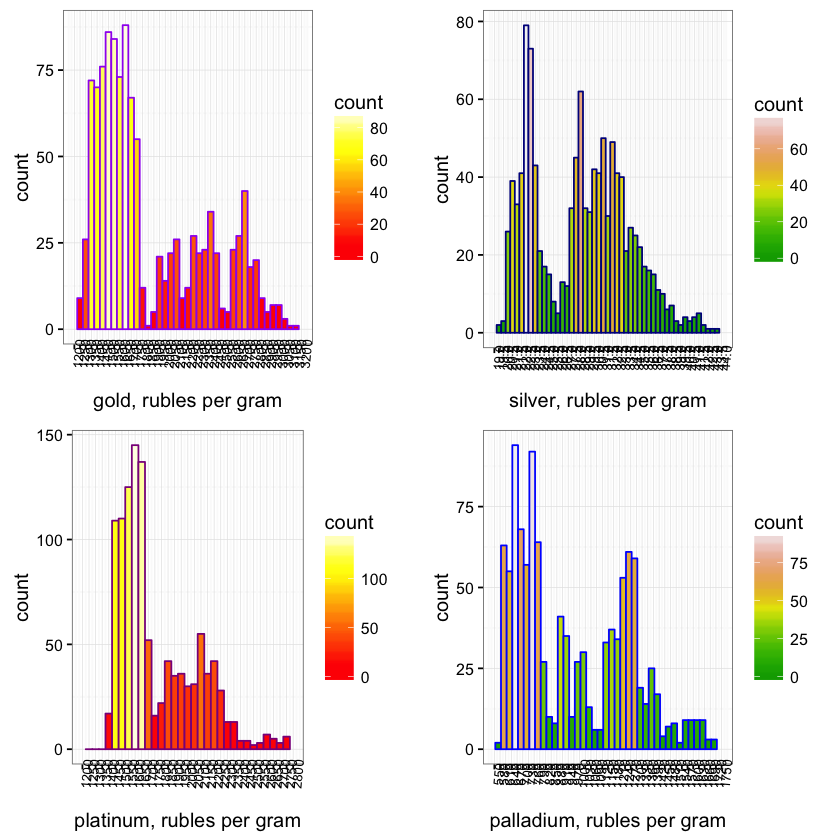

In [23]:
g1 <- grid.arrange(p1, p2, p3, p4, ncol = 2)

##### 3.1.2 Plots for exchange rates (BRL 986, JPY 392, CNY 156, INR 356).

In [24]:
data_length = length(centrobank$BRL_986)
x = seq(1, data_length)
p5 <- ggplot(centrobank) + geom_point(aes(x = x, y = BRL_986, color = x), size = 2, shape = 5) + scale_colour_gradient2_tableau('Red-Blue') + theme_bw()

In [25]:
p6 <- ggplot(centrobank) + geom_point(aes(x = x, y = JPY_392, color = x), size = 2, shape = 12) + scale_colour_gradient2_tableau('Temperature') + theme_bw()

In [26]:
p7 <-ggplot(centrobank) + geom_point(aes(x = x, y = CNY_156, color = x), size = 2, shape = 7) + scale_colour_gradient2_tableau('Temperature') + theme_bw()

In [27]:
p8 <- ggplot(centrobank) + geom_point(aes(x = x, y = INR_356, color = x), size = 2, shape = 9) + scale_colour_gradient2_tableau('Temperature') + theme_bw()

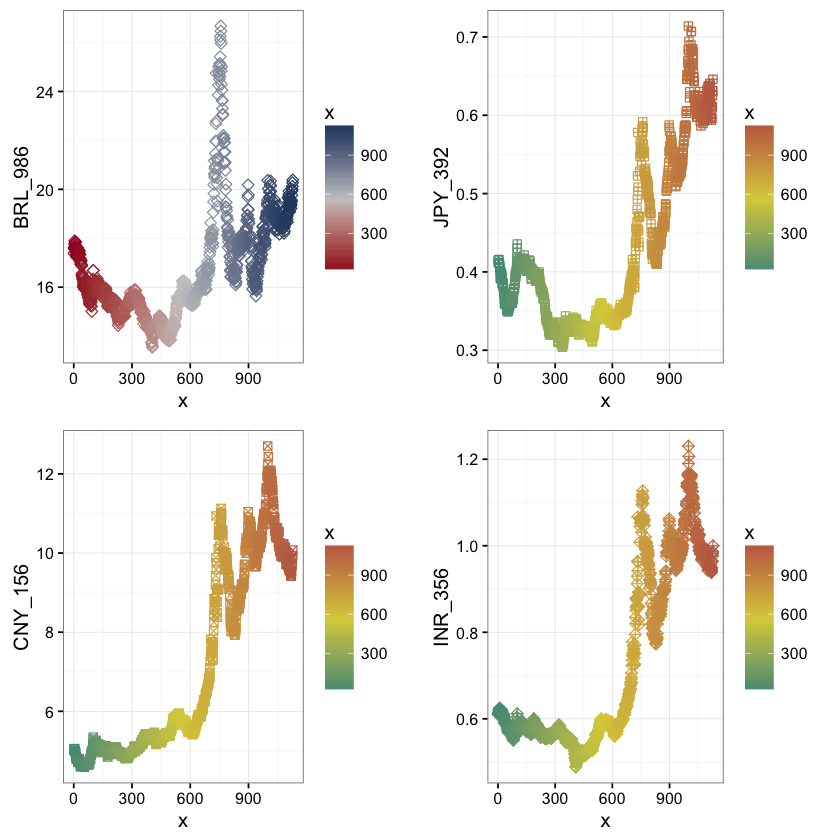

In [28]:
g2 <- grid.arrange(p5, p6, p7, p8, ncol = 2)

##### 3.1.3 Plots for foreign exchange and monetary gold reserves.

In [29]:
p9 <- ggplot(centrobank, aes (x = x, y=foreign_exchange_reserves, color = foreign_exchange_reserves)) + geom_jitter(size = 2, alpha=0.3, shape = 6) + scale_colour_gradientn(colours=rainbow(10)) + geom_smooth(aes(y=foreign_exchange_reserves), color = '#FF6633') + theme_bw() + ylab('foreign exchange reserves, millions of US dollars')

In [30]:
p10 <- ggplot(centrobank, aes (x=x, y=monetary_gold, color = monetary_gold)) + geom_jitter(size = 2, alpha=0.3, shape = 6) + scale_colour_gradientn(colours=rainbow(10)) + geom_smooth(aes(y=monetary_gold), color = '#00FFFF') + theme_bw() + ylab('monetary gold reserves, millions of US dollars')

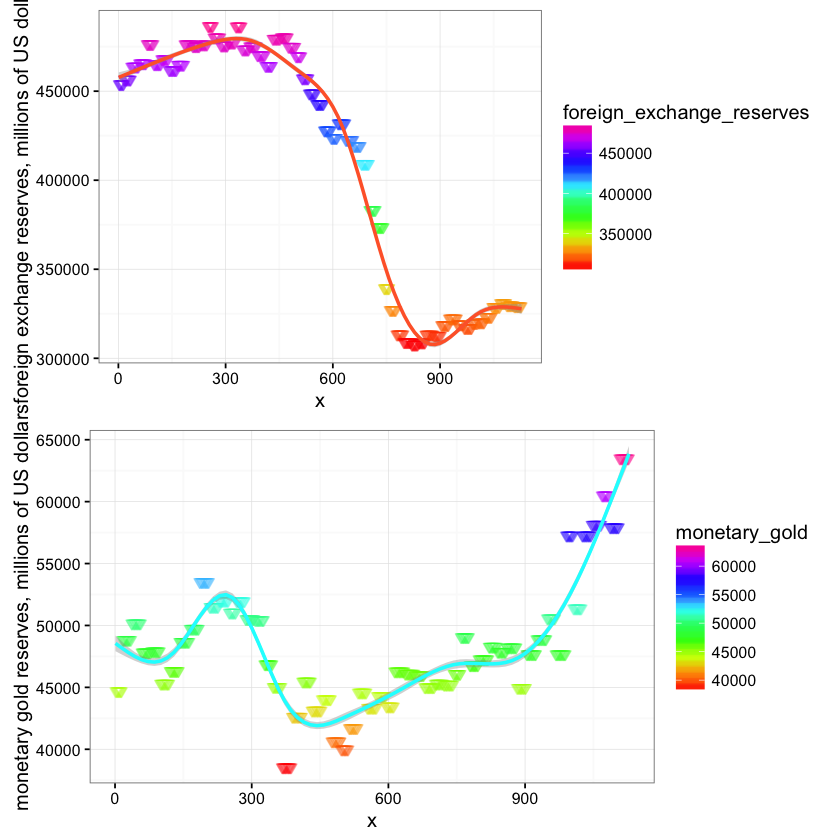

In [31]:
g3 <- grid.arrange(p9, p10, ncol = 1)

## 3.2. Univariate Analysis

##### The structure of my data is the set of the main financial indicators. Only with the first look at the data we could see the similar tendencies in many different cases. So we could predict many dependencies between our variables.

##### Also these indicators show the situation in the country economy in general. For sure it's an interesting subject for investigations.

##### The graphic description of histograms for precious metals: they have a non-symmetrical form, skewed right and multimodal. For gold and platinum we could see a tendency to be unimodal, for silver and palladium - to be bimodal. In practice it means that the prices of gold and platinum were stable at a certain interval for a sufficiently long period of time; for silver and palladium there were two not so long periods of stability. Dispersion of prices is also quite large. The significant price increase in relation to the national currency allows us to consider that the precious metals are reasonable investment.

##### Next graphs show various exchange trends for the Brazilian real and the Asian currencies. The Brazilian real has one rise relative to the Russian ruble, Asian currencies have many peaks. However, there are certain similarities too: a period of small oscillations in the beginning of the chart gave way to a period of sharp spikes.

##### The plots for foreign exchange and monetary gold reserves demonstrate diametrically opposed situation in the resources in the second half of the time interval: the foreign exchange reserves show a downward trend, stocks of monetary gold - a steady rise.


# 4 Bivariate Plots Section

## 4.1 Bivariate Plots

##### 4.1.1 Plots for all pairs of variables.

In [32]:
corr_centrobank <- centrobank[, c(2,3,4,7,10,11,14,15,16,17,18,19,20)]

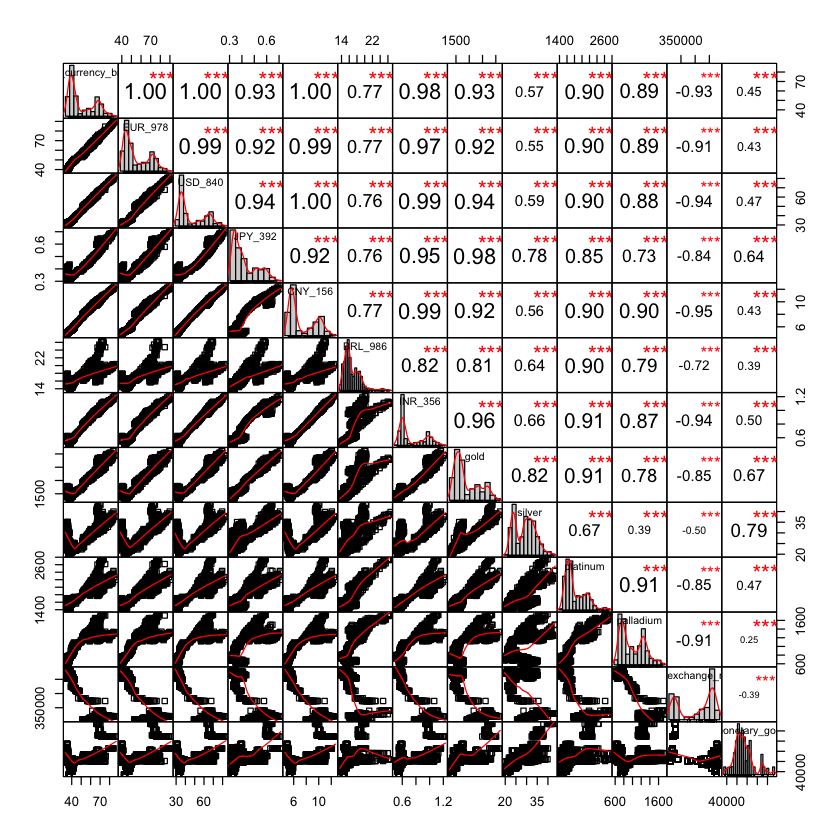

In [39]:
chart.Correlation(corr_centrobank, histogram=TRUE, pch=22)

##### The tables shows a strong correlation between the number of variables, we will examine in detail only some of them.

##### 4.1.2 Plots for prices of precious metals and the dual currency basket.

In [33]:
p11 <- ggplot(centrobank, aes (x=dual_currency_basket, y=gold, color = gold)) + geom_line() + geom_smooth(color = 'darkred') + scale_colour_gradientn(colours=heat.colors(10)) + theme_bw()

In [34]:
p12 <- ggplot(centrobank, aes (x=dual_currency_basket, y=silver, color = silver)) + geom_line() + geom_smooth(color = 'darkgreen') + scale_colour_gradientn(colours=terrain.colors(10)) + theme_bw()

In [35]:
p13 <- ggplot(centrobank, aes (x=dual_currency_basket, y=platinum, color = platinum)) + geom_line() + geom_smooth(color='darkred')+ scale_colour_gradientn(colours=heat.colors(10)) + theme_bw()

In [36]:
p14 <- ggplot(centrobank, aes (x=dual_currency_basket, y=palladium, color = palladium)) + geom_line() + geom_smooth(color = 'darkgreen') + scale_colour_gradientn(colours=terrain.colors(10)) + theme_bw()

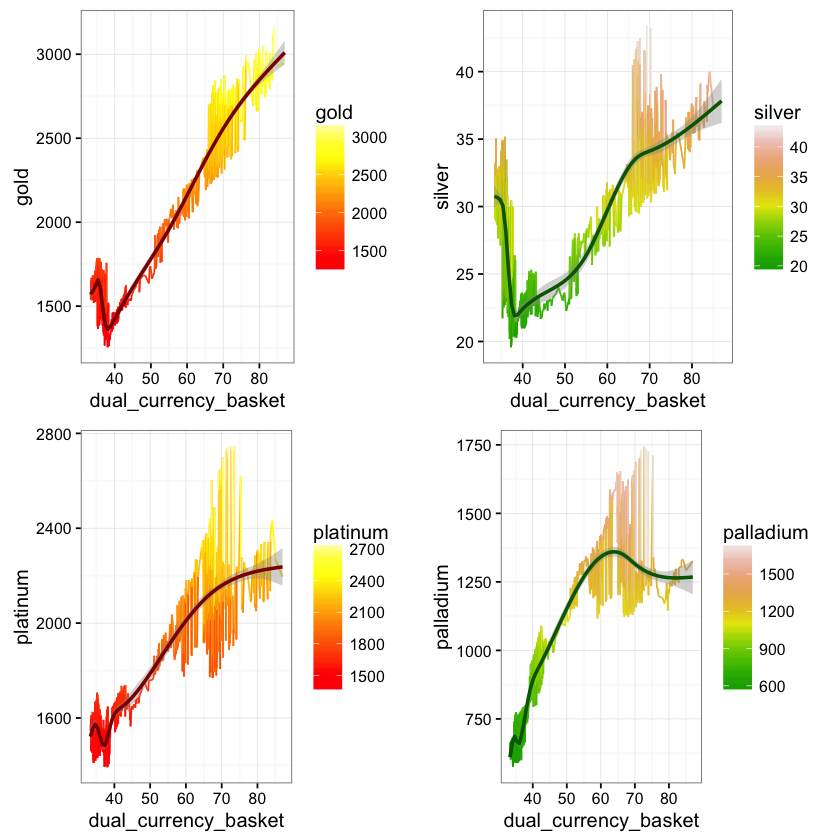

In [37]:
g4 <- grid.arrange(p11, p12, p13, p14, ncol = 2)

##### 4.1.3 Plots for Asian exchange rates and the dual currency basket.

In [38]:
p15 <- ggplot(centrobank, aes (x=dual_currency_basket, y=JPY_392, color = JPY_392)) + geom_line() + geom_smooth(color = 'darkred') + scale_colour_gradientn(colours=heat.colors(10)) + theme_bw()

In [39]:
p16 <- ggplot(centrobank, aes (x=dual_currency_basket, y=CNY_156, color = CNY_156)) + geom_line() + geom_smooth(color = 'darkred') + scale_colour_gradientn(colours=heat.colors(10)) + theme_bw()

In [40]:
p17 <- ggplot(centrobank, aes (x=dual_currency_basket, y=INR_356, color = INR_356)) + geom_line() + geom_smooth(color='darkred')+ scale_colour_gradientn(colours=heat.colors(10)) + theme_bw()

In [41]:
p18 <- ggplot(centrobank, aes (x=JPY_392, y=CNY_156, color = CNY_156)) + geom_line() + geom_smooth(color = 'darkgreen') + scale_colour_gradientn(colours=terrain.colors(10)) + theme_bw()

In [42]:
p19 <- ggplot(centrobank, aes (x=CNY_156, y=INR_356, color = INR_356)) + geom_line() + geom_smooth(color = 'darkgreen') + scale_colour_gradientn(colours=terrain.colors(10)) + theme_bw()

In [43]:
p20 <- ggplot(centrobank, aes (x=JPY_392, y=INR_356, color = INR_356)) + geom_line() + geom_smooth(color = 'darkgreen') + scale_colour_gradientn(colours=terrain.colors(10)) + theme_bw()

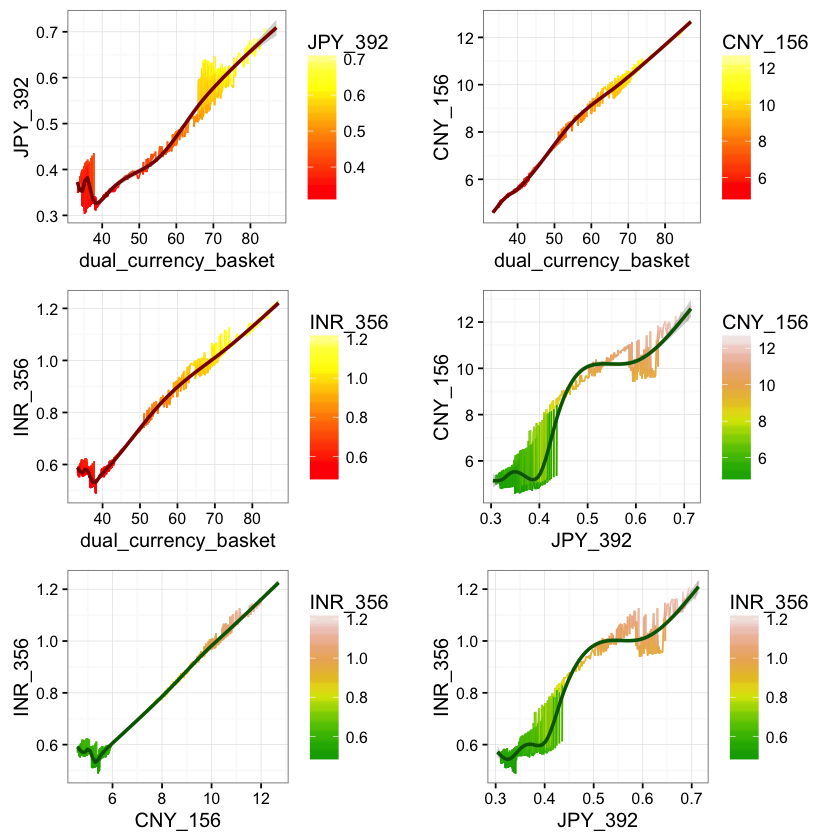

In [44]:
g5 <- grid.arrange(p15, p16, p17, p18, p19, p20, ncol = 2)

##### 4.1.4 Plots for foreign exchange reserves and monetary gold reserves.

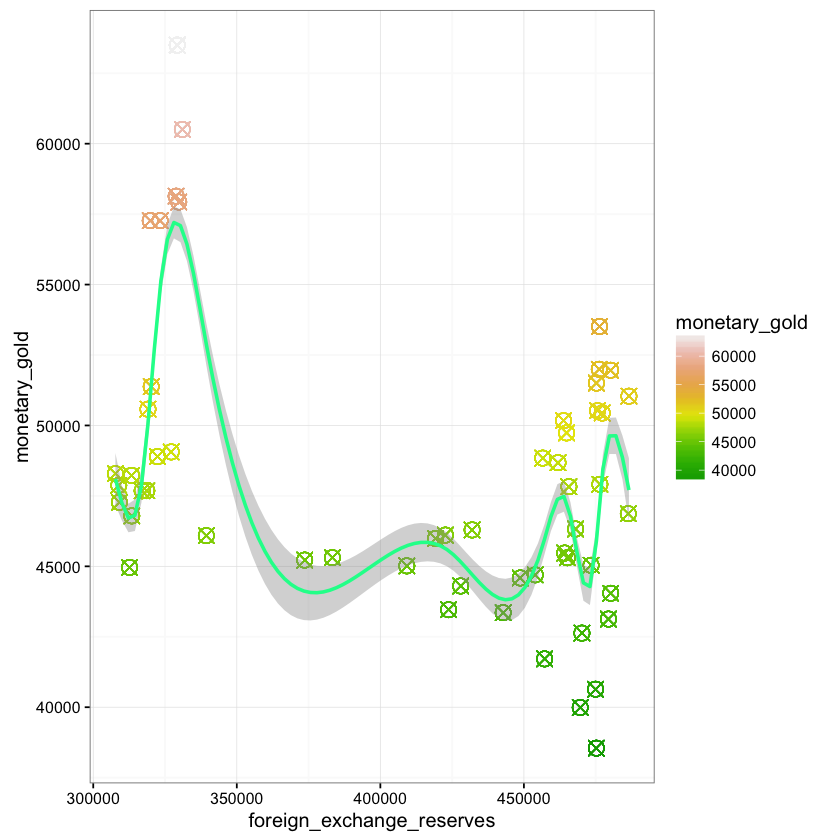

In [107]:
p21 <- ggplot(centrobank, aes (x=foreign_exchange_reserves, y=monetary_gold, color = monetary_gold)) + geom_jitter(shape = 13, size = 4) + geom_smooth(color = '#00FF99') + scale_colour_gradientn(colours=terrain.colors(10)) + theme_bw()
p21

## 4.2 Bivariate Analysis

##### Let's start with correlation tests for these plotted pairs of variables.

In [46]:
with(centrobank, cor.test(dual_currency_basket, gold))
with(centrobank, cor.test(dual_currency_basket, silver))
with(centrobank, cor.test(dual_currency_basket, platinum))
with(centrobank, cor.test(dual_currency_basket, palladium))


	Pearson's product-moment correlation

data:  dual_currency_basket and gold
t = 86.302, df = 1126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9239207 0.9392967
sample estimates:
      cor 
0.9320269 



	Pearson's product-moment correlation

data:  dual_currency_basket and silver
t = 23.544, df = 1126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5338973 0.6122110
sample estimates:
      cor 
0.5743669 



	Pearson's product-moment correlation

data:  dual_currency_basket and platinum
t = 70.021, df = 1126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8902876 0.9121507
sample estimates:
      cor 
0.9017946 



	Pearson's product-moment correlation

data:  dual_currency_basket and palladium
t = 64.112, df = 1126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8727475 0.8979171
sample estimates:
      cor 
0.8859831 


In [47]:
with(centrobank, cor.test(dual_currency_basket, JPY_392))
with(centrobank, cor.test(dual_currency_basket, CNY_156))
with(centrobank, cor.test(dual_currency_basket, INR_356))


	Pearson's product-moment correlation

data:  dual_currency_basket and JPY_392
t = 85.698, df = 1126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9229565 0.9385212
sample estimates:
      cor 
0.9311618 



	Pearson's product-moment correlation

data:  dual_currency_basket and CNY_156
t = 412.21, df = 1126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9962950 0.9970661
sample estimates:
     cor 
0.996703 



	Pearson's product-moment correlation

data:  dual_currency_basket and INR_356
t = 182.94, df = 1126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9815756 0.9853877
sample estimates:
      cor 
0.9835911 


In [48]:
with(centrobank, cor.test(JPY_392, CNY_156))
with(centrobank, cor.test(JPY_392, INR_356))
with(centrobank, cor.test(INR_356, CNY_156))


	Pearson's product-moment correlation

data:  JPY_392 and CNY_156
t = 77.832, df = 1126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9086244 0.9269746
sample estimates:
      cor 
0.9182913 



	Pearson's product-moment correlation

data:  JPY_392 and INR_356
t = 96.989, df = 1126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9384341 0.9509517
sample estimates:
      cor 
0.9450382 



	Pearson's product-moment correlation

data:  INR_356 and CNY_156
t = 202.67, df = 1126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9849159 0.9880411
sample estimates:
      cor 
0.9865685 


In [49]:
with(centrobank, cor.test(foreign_exchange_reserves, monetary_gold))


	Pearson's product-moment correlation

data:  foreign_exchange_reserves and monetary_gold
t = -14.395, df = 1126, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4424186 -0.3437725
sample estimates:
       cor 
-0.3942305 


##### Most of the observed relationships have strong positive correlation (dual_currency_basket & gold, dual_currency_basket & platinum, dual_currency_basket & palladium, dual_currency_basket & JPY-392, dual_currency_basket & INR-356, dual_currency_basket & CNY-156, JPY-392 & CNY-156, JPY-392 & INR-356, INR-356 & CNY-156). A moderate positive relationship is between dual_currency_basket & silver; a weak negative relationship - between foreign_exchange_reserves & monetary_gold. 

##### The strongest relationship I had found is between dual_currency_basket & CNY-156.

##### The revealed dependencies are based on cause-and-effect relationships, the fall of the national currency value in relation to a set of major currencies undoubtedly leads to the fall of this indicator in relation to other currencies and precious metals. Even a weak relationship between foreign exchange reserves and monetary gold reserves does not look accidental: reduced confidence to the foreign exchange reserves of the state leads to the accumulation of resources in another equivalent.

# 5 Multivariate Plots Section

## 5.1 Multivariate Plots

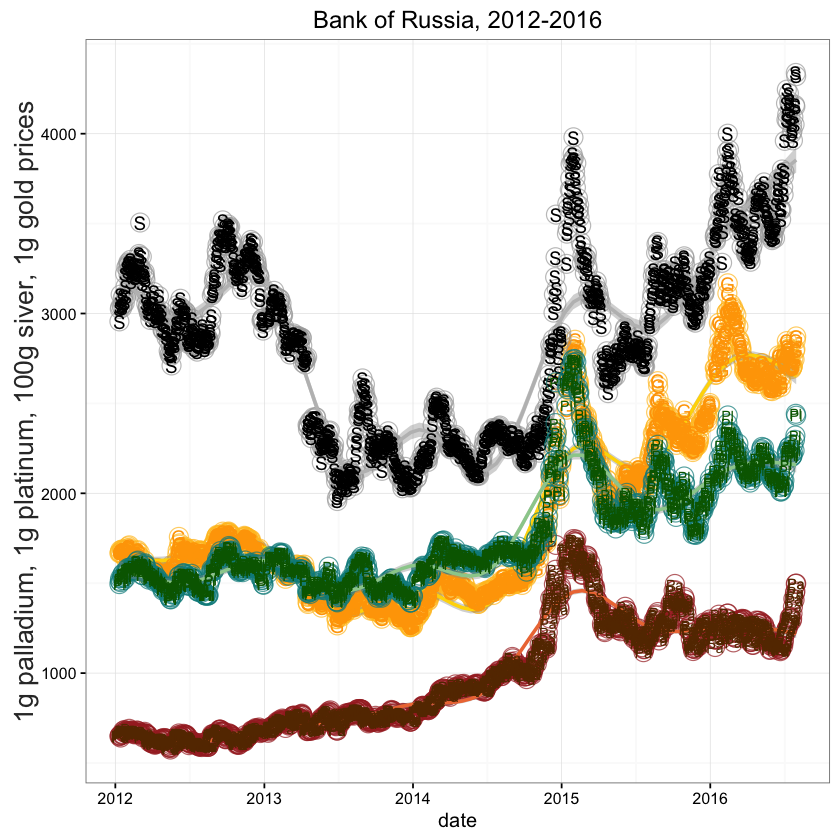

In [108]:
p22<- ggplot(data = centrobank, aes(x = date)) + 
  geom_point(aes(y=centrobank$gold), color = 'goldenrod1', shape=1, alpha=0.7, size = 5) + 
  geom_smooth(aes(y=centrobank$gold), color = 'gold') + 
  geom_text(data=centrobank, mapping=aes(y=centrobank$gold), label='G',size=4, color ='orange') +
  geom_point(aes(y=100*centrobank$silver), color = 'darkgrey', shape=1, alpha=0.7, size = 5) + 
  geom_smooth(aes(y=100*centrobank$silver), color = 'grey') + 
  geom_text(data=centrobank, mapping=aes(y=100*centrobank$silver), label='S',size=4, color ='black') +
  geom_point(aes(y=centrobank$palladium), color = 'brown', shape=1, alpha=0.7, size = 5) + 
  geom_smooth(aes(y=centrobank$palladium), color = 'sienna2') + 
  geom_text(data=centrobank, mapping=aes(y=centrobank$palladium),label='Pa', size=3, color ='#663300') +
  geom_point(aes(y=centrobank$platinum), color = 'darkcyan', shape=1, alpha=0.7, size = 5) + 
  geom_smooth(aes(y=centrobank$platinum), color = 'darkseagreen3') +
  geom_text(data=centrobank, mapping=aes(y=centrobank$platinum), label='Pl', size=3, color ='darkgreen') +
  ylab('1g palladium, 1g platinum, 100g siver, 1g gold prices') + 
  ggtitle('Bank of Russia, 2012-2016') + theme_bw() +
  theme(axis.title.y = element_text(colour="grey20",size=16,angle=90,hjust=.5,vjust=.5,face="plain"))
p22

In [109]:
note1 = 'JPY'
note2 = 'USD'
note3 = 'EUR'
note4 = 'CNY'
note5 = 'INR'
x1 = centrobank[1000,1]
y1 = 100*centrobank[1000,7]
x2 = centrobank[4,1]
y2 = centrobank[4,4]
x3 = centrobank[7,1]
y3 = centrobank[7,3]
x4 = centrobank[920,1]
y4 = 10*centrobank[920,10]
x5 = centrobank[1080,1]
y5 = 100*centrobank[1080,14]

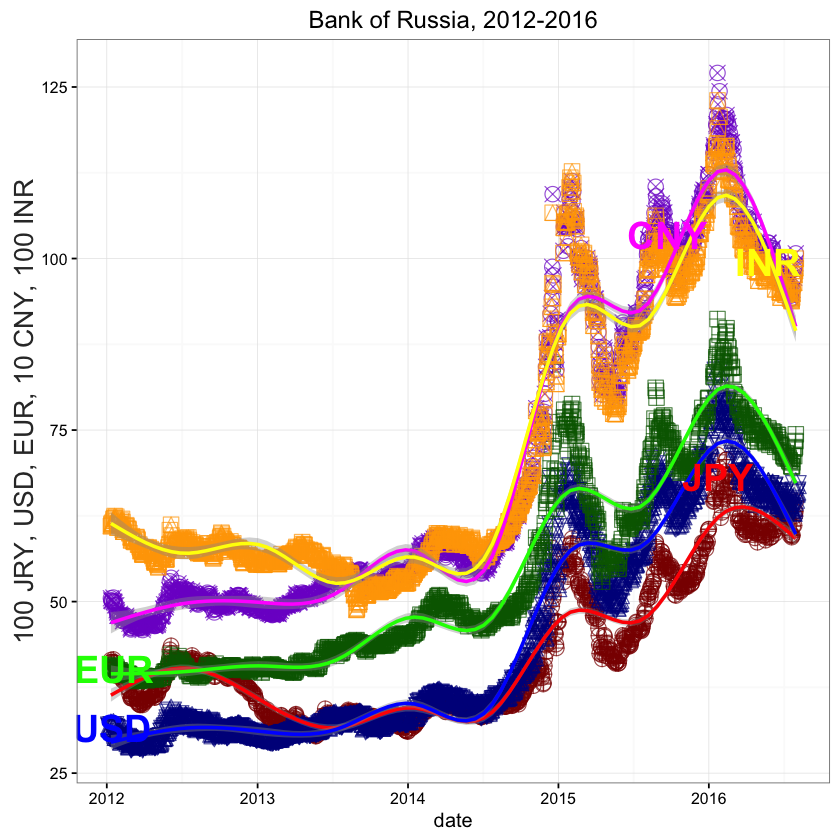

In [110]:
p23 <- ggplot(data = centrobank, aes(x = date)) + 
  geom_point(aes(y=100*centrobank$JPY_392), color = 'darkred', shape=10, alpha=0.7, size = 4) + 
  geom_point(aes(y=centrobank$USD_840, label=note2), color = 'darkblue', shape=11, alpha=0.7, size = 4) + 
  geom_point(aes(y=centrobank$EUR_978), color = 'darkgreen', shape=12, alpha=0.7, size = 4) + 
  geom_point(aes(y=10*centrobank$CNY_156), color = 'purple3', shape=13, alpha=0.7, size = 4) + 
  geom_point(aes(y=100*centrobank$INR_356), color = 'orange', shape=14, alpha=0.7, size = 4) + 
  geom_smooth(aes(y=100*centrobank$JPY_392), color = 'red') +  
  geom_smooth(aes(y=centrobank$USD_840), color = 'blue') +  
  geom_smooth(aes(y=centrobank$EUR_978), color = 'green') +  
  geom_smooth(aes(y=10*centrobank$CNY_156), color = 'magenta') +  
  geom_smooth(aes(y=100*centrobank$INR_356), color = 'yellow') + 
  annotate(geom="text",x=as.Date(x1),y=y1,label=note1,fontface="bold",size = 8,color = "red") +
  annotate(geom="text",x=as.Date(x2),y=y2,label=note2,fontface="bold",size = 8,color = "blue") +
  annotate(geom="text",x=as.Date(x3),y=y3,label=note3,fontface="bold",size = 8,color = "green") +
  annotate(geom="text",x=as.Date(x4),y=y4,label=note4,fontface="bold",size = 8,color="magenta") +
  annotate(geom="text",x=as.Date(x5),y=y5,label=note5,fontface="bold",size = 8,color="yellow") +
  ylab('100 JRY, USD, EUR, 10 CNY, 100 INR') + 
  ggtitle('Bank of Russia, 2012-2016') + theme_bw() + 
  theme(axis.title.y = element_text(colour="grey20",size=16,angle=90,hjust=.5,vjust=.5,face="plain"))
p23

##### 5.1.2 A plot for exchange rates (USD, EUR) and gold price in 2015-2016.

In [48]:
centrobank2016 = subset(centrobank, year == 2015 | year == 2016)
# plot_ly(centrobank2016, x=EUR_978, y=USD_840, z=gold, color = gold, text = paste(date), colors = 'Spectral', type="scatter3d", mode="markers", marker = list(size = 8, symbol = "circle-open"))

##### 5.1.3 A plot for prices of precious metals (gold, silver) and dual currency basket in 2015-2016.

In [49]:
# plot_ly(centrobank2016, x=gold, y=silver, z=dual_currency_basket, color = dual_currency_basket, text = paste(date), colors = 'Spectral', type="scatter3d", mode="markers", marker = list(size = 8, symbol = "diamond-open"))

## 5.2 Multivariate Analysis

##### It is easy to see that the prices of precious metals and currencies show almost the same trend concerning the national currency. Only silver prices were different from everyone else. For this metal price dynamics in most cases is decreasing in the 2012-2014 period.

##### These conclusions are confirmed by three-dimensional graphics. Adding the price of silver as a variable had led to the considerable spread of the data.

## 5.3 OPTIONAL: Building the Linear Model

##### We can construct a model of the dependence the price of gold on the price of the currency basket and the prices of other precious metals.

In [91]:
m1 <- lm(gold ~ dual_currency_basket, data = centrobank)
m2 <- update(m1, ~ . + platinum)
m3 <- update(m2, ~ . + palladium)
m4 <- update(m3, ~ . + silver)
# mtable(m1, m2, m3, m4)

In [92]:
summary(m1)


Call:
lm(formula = gold ~ dual_currency_basket, data = centrobank)

Residuals:
    Min      1Q  Median      3Q     Max 
-299.87 -159.74  -50.51  163.02  412.84 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           422.931     17.455   24.23   <2e-16 ***
dual_currency_basket   29.692      0.344   86.30   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 173.5 on 1126 degrees of freedom
Multiple R-squared:  0.8687,	Adjusted R-squared:  0.8686 
F-statistic:  7448 on 1 and 1126 DF,  p-value: < 2.2e-16


In [103]:
summary(m2)


Call:
lm(formula = gold ~ dual_currency_basket + platinum, data = centrobank)

Residuals:
    Min      1Q  Median      3Q     Max 
-280.27 -140.06  -41.87  155.91  346.26 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -134.44050   36.92984   -3.64 0.000285 ***
dual_currency_basket   18.97506    0.71330   26.60  < 2e-16 ***
platinum                0.61054    0.03665   16.66  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 155.4 on 1125 degrees of freedom
Multiple R-squared:  0.8947,	Adjusted R-squared:  0.8945 
F-statistic:  4778 on 2 and 1125 DF,  p-value: < 2.2e-16


In [104]:
summary(m3)


Call:
lm(formula = gold ~ dual_currency_basket + platinum + palladium, 
    data = centrobank)

Residuals:
     Min       1Q   Median       3Q      Max 
-274.436  -87.255    3.025   82.304  310.619 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -588.20074   27.26725  -21.57   <2e-16 ***
dual_currency_basket   25.78621    0.50612   50.95   <2e-16 ***
platinum                1.24698    0.02955   42.20   <2e-16 ***
palladium              -1.03071    0.02722  -37.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 103.1 on 1124 degrees of freedom
Multiple R-squared:  0.9537,	Adjusted R-squared:  0.9536 
F-statistic:  7719 on 3 and 1124 DF,  p-value: < 2.2e-16


In [105]:
summary(m4)


Call:
lm(formula = gold ~ dual_currency_basket + platinum + palladium + 
    silver, data = centrobank)

Residuals:
     Min       1Q   Median       3Q      Max 
-158.467  -33.990   -3.529   31.214  232.460 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -407.19175   13.67745 -29.771  < 2e-16 ***
dual_currency_basket   21.74424    0.25664  84.726  < 2e-16 ***
platinum                0.21545    0.02251   9.572  < 2e-16 ***
palladium              -0.15533    0.01979  -7.848 9.79e-15 ***
silver                 34.60843    0.57887  59.786  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.42 on 1123 degrees of freedom
Multiple R-squared:  0.9889,	Adjusted R-squared:  0.9889 
F-statistic: 2.509e+04 on 4 and 1123 DF,  p-value: < 2.2e-16


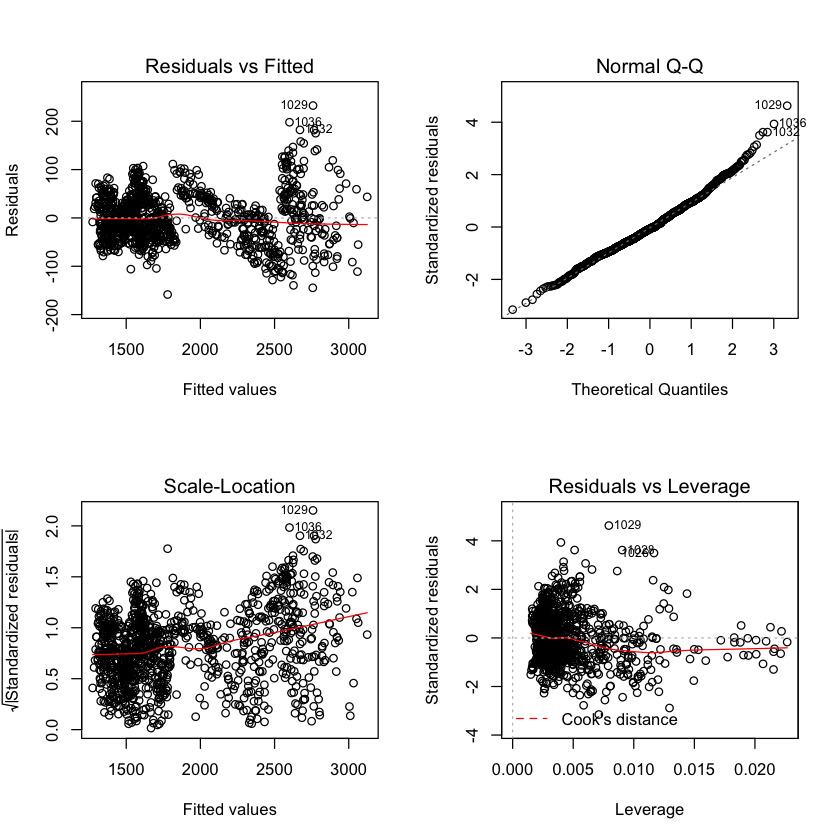

In [101]:
par(mfrow=c(2,2))
plot(m4)
par(mfrow=c(1,1))

##### All derived statistical coefficients unambiguously confirm the existence of relationships between these indicators and the fairly good quality of the constructed model.

# 6 Final Plots and Summary

### 6.1.1 Plot One

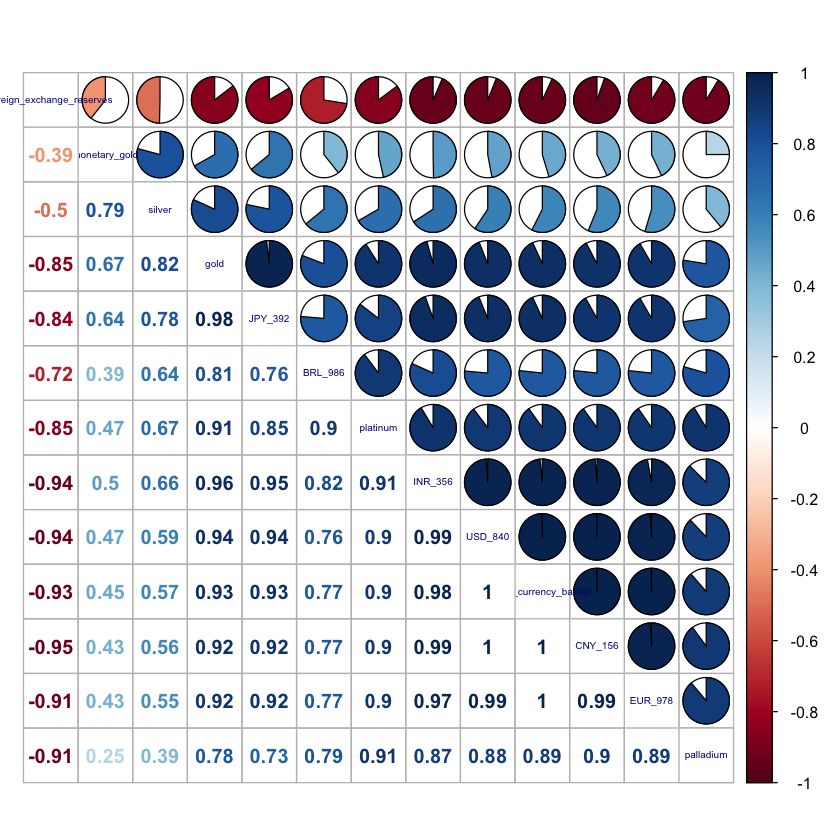

In [106]:
mcorr_centrobank <- cor(corr_centrobank)
corrplot.mixed(mcorr_centrobank, lower="number", upper="pie", order ="AOE", tl.col="darkblue", tl.cex=0.5)

### 6.1.2 Description One

##### The first final plot is a graphical table of correlation between variables. It emphasizes once again the strong relationship between almost all indicators.

### 6.2.1 Plot Two

### 6.2.2 Description Two

### 6.3.1 Plot Three

### 6.3.2 Description Three

# 7 Reflection

##### The centrobank data set contains information on almost 1,100 days of measuring the economic indicators. The data description can be found in the file with this database on the second page.

##### In general it's a very difficult sphere for prediction because of many external factors, so for more correct researching I think it needs to have about 5000-10000 rows of data and some additional factors (oil prices, for example).

##### For this project, I have set for myself the task of training rather than a researching. I have been studying and applying the programming language R for the first time so I had chosen the lightest model for investigating, where economic relations between the variables are obvious.

##### For these goals different plotting techniques had been used. R has a very wide range of instruments, I hope I was able to learn at least some of them.

##### In addition, I have been studying to apply this language in the R-Studio and the Jupyter Notebook. In some cases, I was unable to apply the same methodology. For example, I would like to know how to use the plotly package in the Jupyter Notebook, but it shows errors during installation. 

##### The broad field of research is ahead with the addition of more and more wide range of methods and indicators.
